<a href="https://colab.research.google.com/github/RounakMishra9905/DataScienceWinterProject-2023-Rounak-Mishra-/blob/main/230876_Rounak%20Mishra/Assignment_3/Assignment3(Rounak_MIshra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


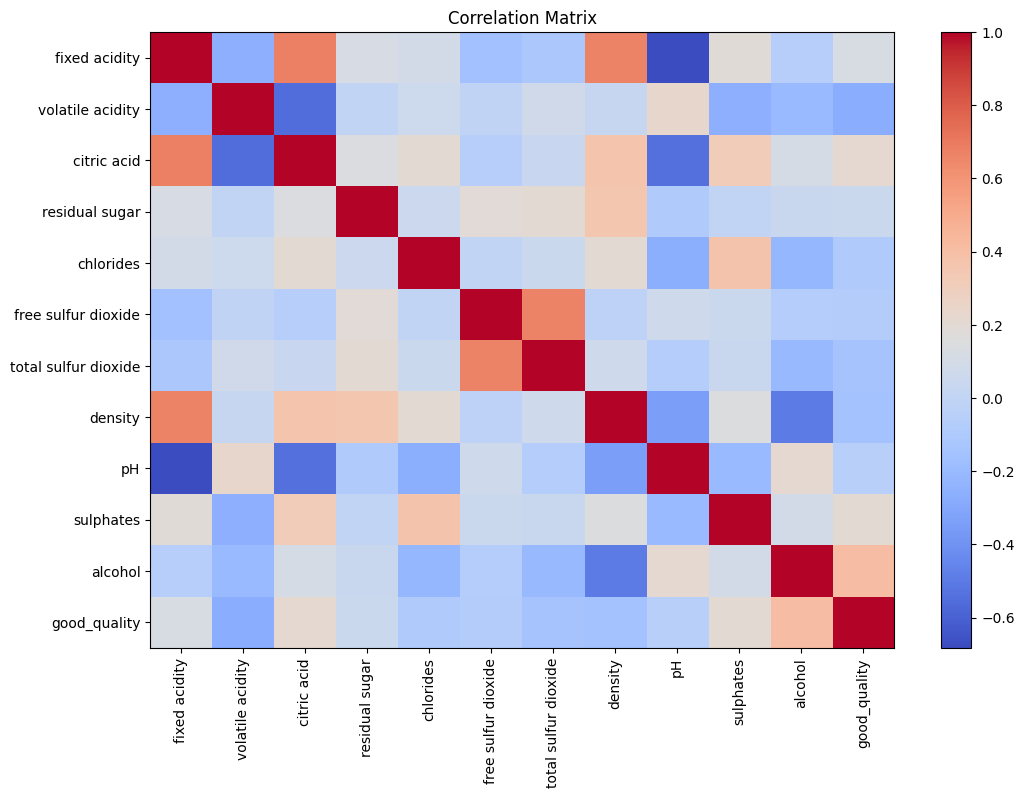

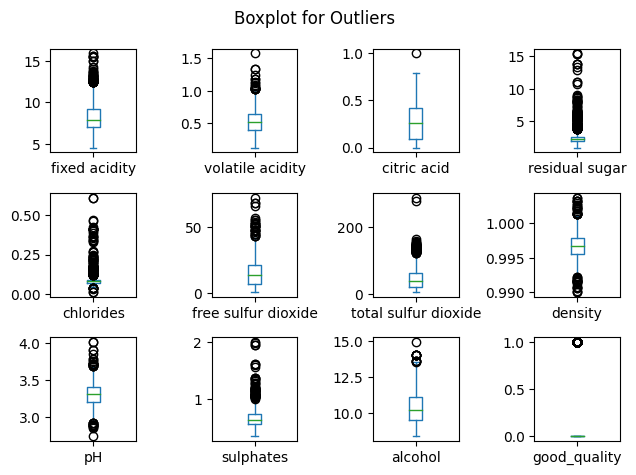

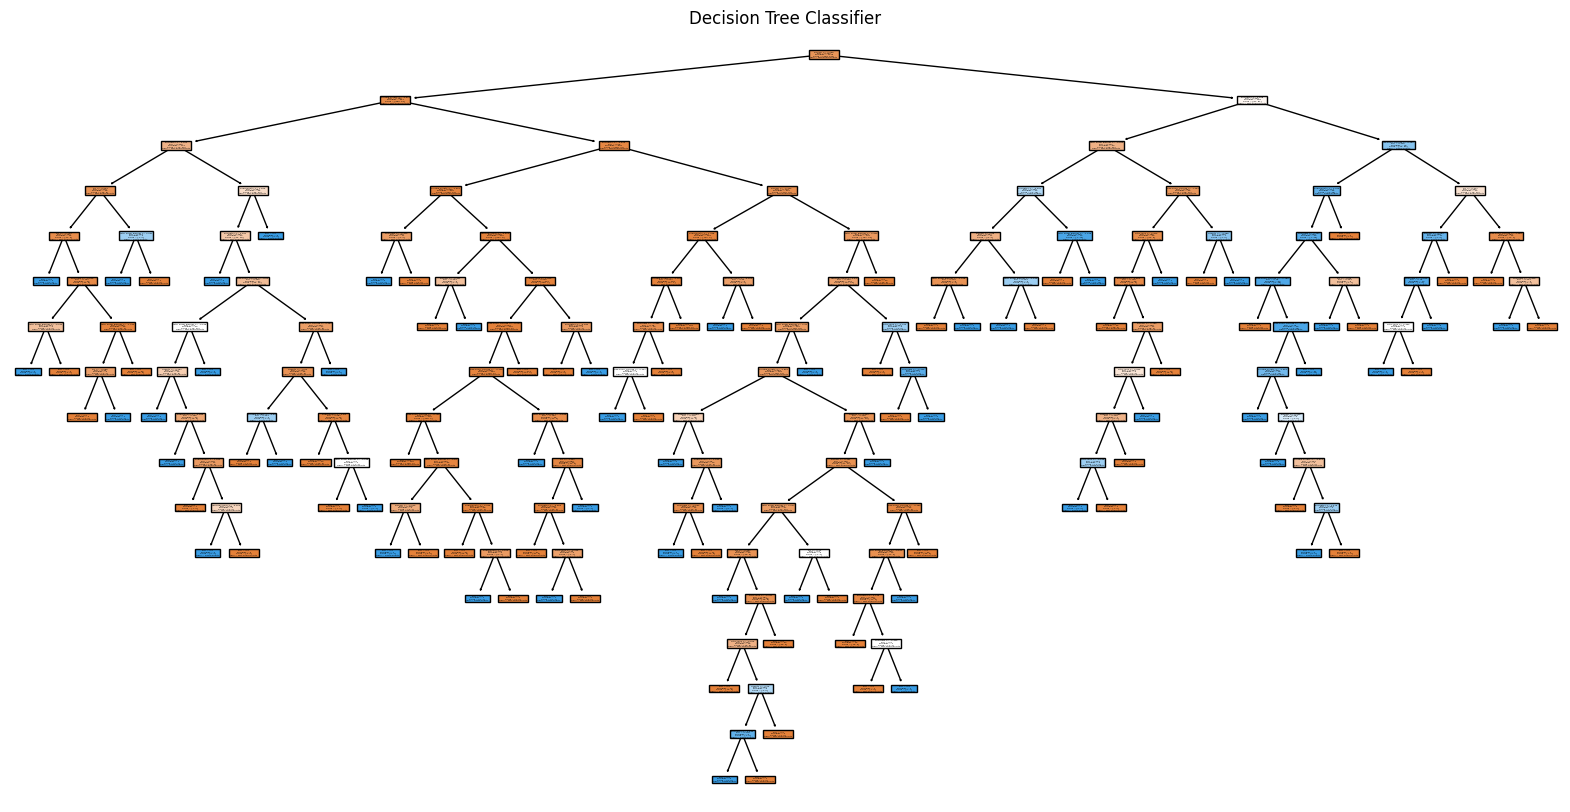

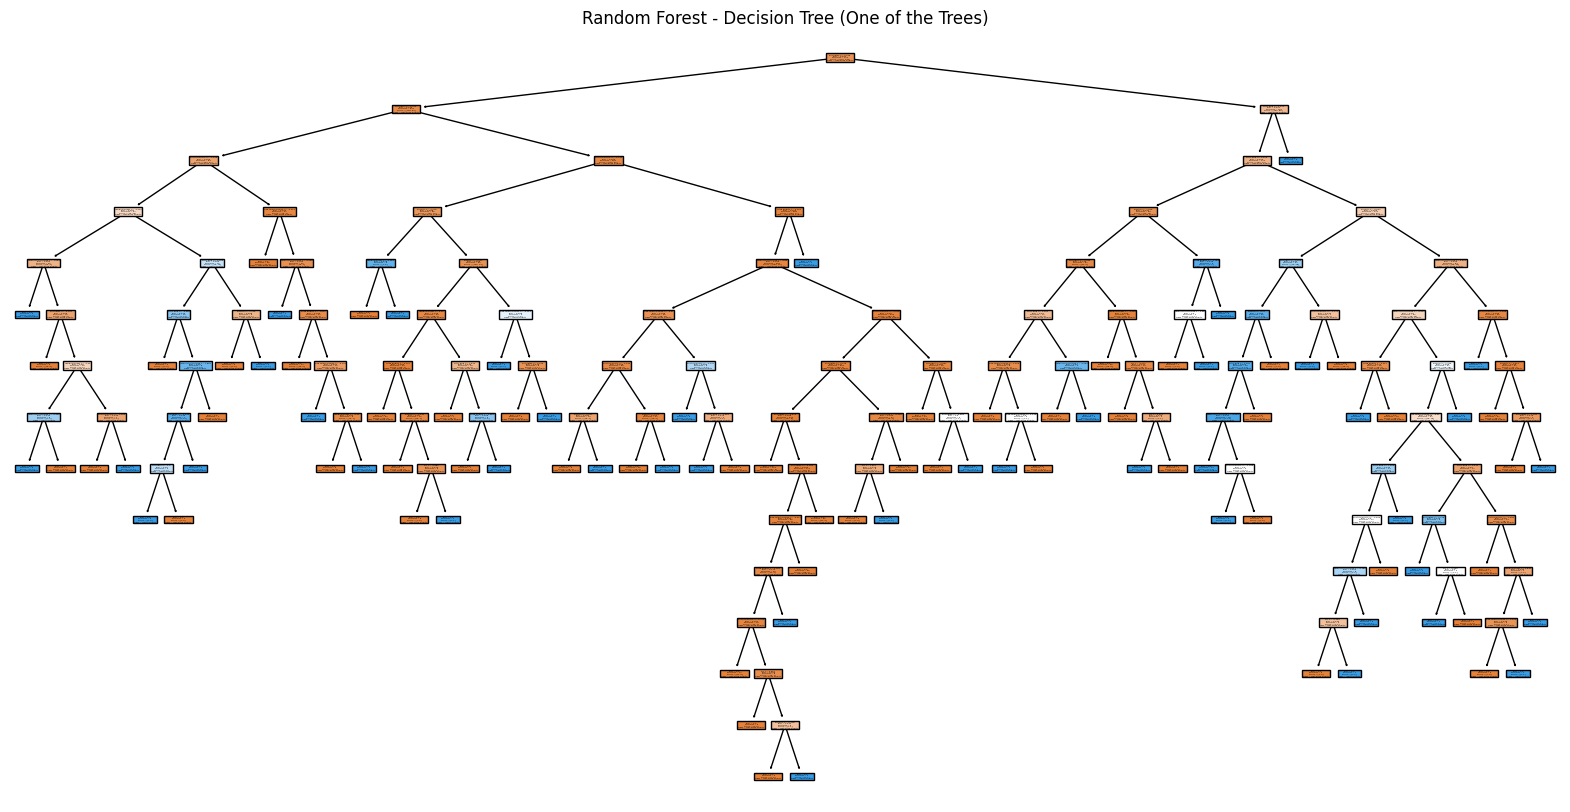


Decision Trees Classifier:
Accuracy: 0.8604166666666667
F1 Score: 0.5562913907284769

Random Forest Classifier:
Accuracy: 0.8875
F1 Score: 0.55


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")


df['good_quality'] = np.where(df['quality'] >= 7, 1, 0)
df = df.drop('quality', axis=1)




correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.suptitle("Boxplot for Outliers")
plt.tight_layout()

plt.show()


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('good_quality', axis=1)), columns=df.columns[:-1])
df_scaled['good_quality'] = df['good_quality']


X = df_scaled.drop('good_quality', axis=1)
y = df_scaled['good_quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)


plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Good Quality', 'Good Quality'])
plt.title("Decision Tree Classifier")
plt.show()


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)


plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=['Not Good Quality', 'Good Quality'])
plt.title("Random Forest - Decision Tree (One of the Trees)")
plt.show()


dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

print("\nDecision Trees Classifier:")
print("Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1_score)

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1_score)
